In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


/Users/karthickkumarasamy/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:

# Load dataset
#df = pd.read_csv("5g_qos_data.csv")
df = pd.read_csv('synthetic_5g_qos_dataset_10000.csv')


In [3]:
df

,source_ip,destination_ip,protocol,packet_size,inter_arrival_time_ms,jitter_ms,qos_class
0,192.168.187.205,192.0.2.91,TCP,278,27.53,1.06,URLLC
1,192.168.83.71,192.0.2.32,ICMP,353,147.20,2.66,mMTC
2,192.168.157.92,192.0.2.44,ICMP,381,14.29,3.14,URLLC
3,192.168.183.32,192.0.2.73,UDP,1409,48.91,7.46,eMBB
4,192.168.39.115,192.0.2.179,UDP,246,25.61,2.66,URLLC
...,...,...,...,...,...,...,...
9995,192.168.180.129,192.0.2.169,UDP,1122,20.55,1.36,URLLC
9996,192.168.238.209,192.0.2.224,TCP,218,89.87,8.31,mMTC
9997,192.168.58.167,192.0.2.130,TCP,780,60.44,6.08,mMTC
9998,192.168.202.241,192.0.2.75,ICMP,678,15.18,4.26,URLLC


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   source_ip              10000 non-null  object 
 1   destination_ip         10000 non-null  object 
 2   protocol               10000 non-null  object 
 3   packet_size            10000 non-null  int64  
 4   inter_arrival_time_ms  10000 non-null  float64
 5   jitter_ms              10000 non-null  float64
 6   qos_class              10000 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 547.0+ KB


In [5]:
df.describe()

,packet_size,inter_arrival_time_ms,jitter_ms
count,10000.000000,10000.000000,10000.000000
mean,814.383500,56.667700,4.664463
std,397.780548,38.155083,1.990800
min,100.000000,1.600000,0.060000
25%,463.000000,23.280000,3.130000
50%,800.000000,48.560000,4.450000
75%,1169.000000,79.415000,6.010000
max,1500.000000,209.350000,12.870000


In [6]:
df.dtypes

source_ip                 object
destination_ip            object
protocol                  object
packet_size                int64
inter_arrival_time_ms    float64
jitter_ms                float64
qos_class                 object
dtype: object

In [7]:
df.value_counts()

source_ip        destination_ip  protocol  packet_size  inter_arrival_time_ms  jitter_ms  qos_class
192.168.0.10     192.0.2.71      ICMP      714          133.78                 3.77       mMTC         1
192.168.250.70   192.0.2.100     UDP       970          4.48                   3.29       URLLC        1
192.168.250.244  192.0.2.237     UDP       170          78.03                  7.56       mMTC         1
                 192.0.2.238     ICMP      292          16.72                  2.50       URLLC        1
192.168.250.28   192.0.2.52      TCP       886          24.83                  3.77       URLLC        1
                                                                                                      ..
192.168.175.92   192.0.2.201     TCP       188          120.70                 5.62       mMTC         1
192.168.176.10   192.0.2.37      ICMP      143          119.24                 3.83       mMTC         1
192.168.176.118  192.0.2.178     UDP       1485         57.4

In [8]:
df.columns

Index(['source_ip', 'destination_ip', 'protocol', 'packet_size',
       'inter_arrival_time_ms', 'jitter_ms', 'qos_class'],
      dtype='object')

In [9]:
# Features and labels
X = df.drop("qos_class", axis=1)
y = df["qos_class"]


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score



In [11]:

# Load your dataset
df = pd.read_csv("synthetic_5g_qos_dataset_10000.csv")  # Replace with actual file path


In [12]:

# Encode categorical features
le_ip_src = LabelEncoder()
le_ip_dst = LabelEncoder()
le_proto = LabelEncoder()
le_qos = LabelEncoder()


df['source_ip_enc'] = le_ip_src.fit_transform(df['source_ip'])
df['destination_ip_enc'] = le_ip_dst.fit_transform(df['destination_ip'])
df['protocol_enc'] = le_proto.fit_transform(df['protocol'])
df['qos_class_enc'] = le_qos.fit_transform(df['qos_class'])

In [13]:

# Define features and target
features = ['source_ip_enc', 'destination_ip_enc', 'protocol_enc', 'packet_size', 'inter_arrival_time_ms', 'jitter_ms']
target = 'qos_class_enc'


In [14]:

features

['source_ip_enc',
 'destination_ip_enc',
 'protocol_enc',
 'packet_size',
 'inter_arrival_time_ms',
 'jitter_ms']

In [15]:
target

'qos_class_enc'

In [16]:
X = df[features]
y = df[target]


In [17]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:

# Model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [19]:

# Prediction
y_pred = model.predict(X_test)


In [20]:

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9905
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       693
           1       0.99      0.99      0.99       662
           2       1.00      0.99      1.00       645

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



In [21]:
y_test_labels = le_qos.inverse_transform(y_test)
y_pred_labels = le_qos.inverse_transform(y_pred)

In [22]:
y_test_labels

array(['URLLC', 'URLLC', 'eMBB', ..., 'URLLC', 'URLLC', 'URLLC'],
      dtype=object)

In [23]:
y_pred_labels

array(['URLLC', 'URLLC', 'eMBB', ..., 'URLLC', 'URLLC', 'URLLC'],
      dtype=object)

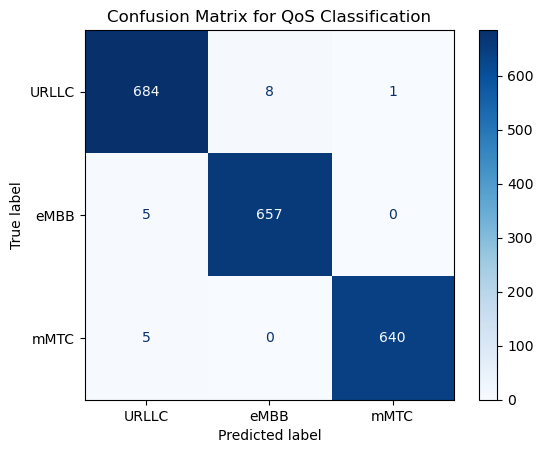

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Optional: If you want class names instead of numbers (reverse the label encoding)
class_names = le_qos.inverse_transform([0, 1, 2])  # Adjust based on your encoded classes

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for QoS Classification")
plt.show()


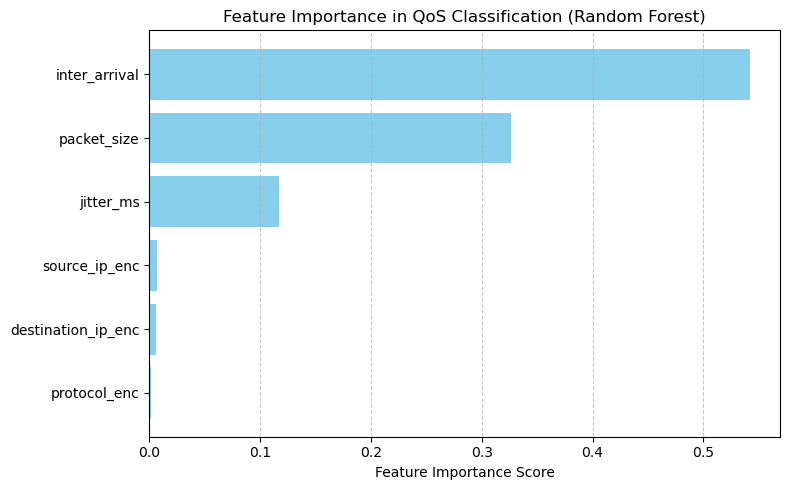

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Get feature importances
importances = model.feature_importances_

# Match with feature names
feature_names = ['source_ip_enc', 'destination_ip_enc', 'protocol_enc', 'packet_size', 'inter_arrival', 'jitter_ms']

# Create DataFrame for better visualization
feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
plt.barh(feature_df['Feature'], feature_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance Score")
plt.title("Feature Importance in QoS Classification (Random Forest)")
plt.gca().invert_yaxis()  # Highest importance on top
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [26]:
from sklearn.metrics import accuracy_score

# Predict on training set
y_train_pred = model.predict(X_train)

# Accuracy scores
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy:     {test_acc:.4f}")


Training Accuracy: 1.0000
Test Accuracy:     0.9905


ROC curves are binary classifiers by nature.
To compute multi-class ROC curves, each class must be compared against all others (One-vs-Rest).
So, label_binarize() converts something like

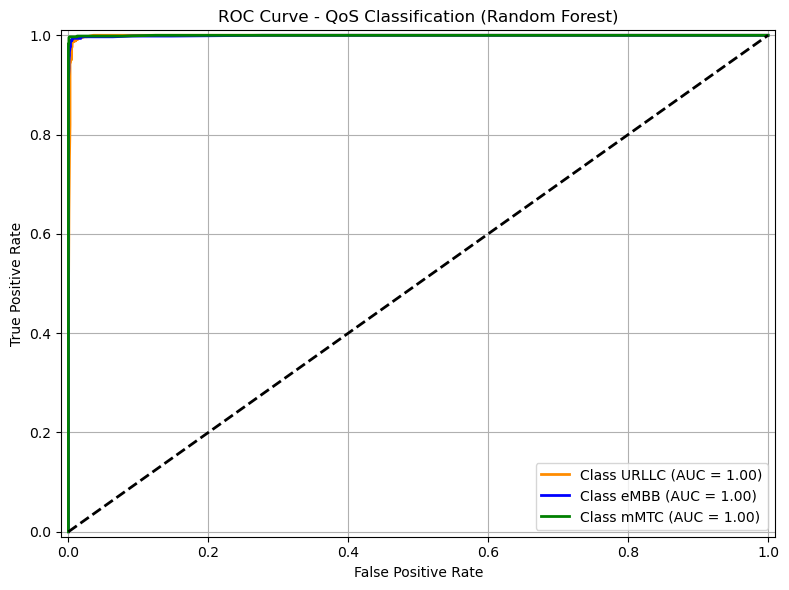

In [31]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

# Step 1: Get probability estimates for each class
y_score = model.predict_proba(X_test)

# Step 2: Binarize the output labels
n_classes = len(np.unique(y))
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# Step 3: Compute ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Step 4: Plot ROC Curves
colors = cycle(['darkorange', 'blue', 'green'])
plt.figure(figsize=(8, 6))

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {le_qos.inverse_transform([i])[0]} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - QoS Classification (Random Forest)')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()



📄 Macro Average AUC: 0.9994
📄 Weighted Average AUC: 0.9994


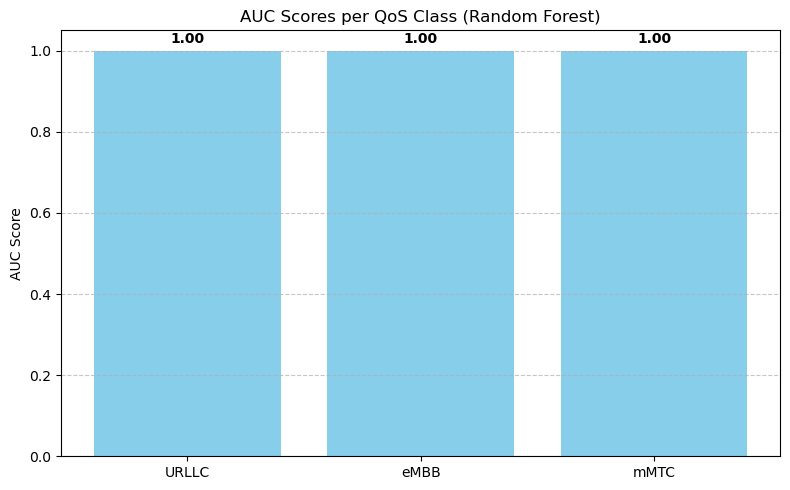

In [32]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Number of classes
n_classes = len(np.unique(y))

# Binarize true labels
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# Get probability scores from the model
y_score = model.predict_proba(X_test)

# Compute AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
auc_scores = []

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    auc_scores.append(roc_auc[i])

# Print macro and weighted average AUC
macro_auc = np.mean(auc_scores)
weighted_auc = roc_auc_score(y_test_bin, y_score, average='weighted', multi_class='ovr')
print(f"\n📄 Macro Average AUC: {macro_auc:.4f}")
print(f"📄 Weighted Average AUC: {weighted_auc:.4f}")

# 📊 Bar chart of AUC per class
qos_labels = le_qos.inverse_transform(np.arange(n_classes))

plt.figure(figsize=(8, 5))
bars = plt.bar(qos_labels, auc_scores, color='skyblue')
plt.ylim(0.0, 1.05)
plt.ylabel('AUC Score')
plt.title('AUC Scores per QoS Class (Random Forest)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add text labels above bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.02, f"{height:.2f}", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()
